In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 13 生成随机数

Numpy.random模块下提供了一些常用的随机函数，可以生成不同概率分布的随机数。

In [2]:
np.random.rand(3, 3) # [0,1) 区间的数

array([[0.80356311, 0.39336894, 0.43208362],
       [0.42206863, 0.03063515, 0.5683432 ],
       [0.25142848, 0.86781297, 0.51913174]])

In [3]:
a = np.random.randint(1, 7, 10000)

In [4]:
a

array([1, 4, 2, ..., 5, 5, 6])

In [5]:
b = np.random.randint(1, 7, 10000)

In [6]:
b

array([1, 3, 5, ..., 4, 6, 6])

In [7]:
c = a + b

In [8]:
c

array([ 2,  7,  7, ...,  9, 11, 12])

(array([0.03223, 0.05995, 0.0858 , 0.12485, 0.15488, 0.17688, 0.15543,
        0.12408, 0.0924 , 0.06512, 0.02838]),
 array([ 2.        ,  2.90909091,  3.81818182,  4.72727273,  5.63636364,
         6.54545455,  7.45454545,  8.36363636,  9.27272727, 10.18181818,
        11.09090909, 12.        ]),
 <a list of 11 Patch objects>)

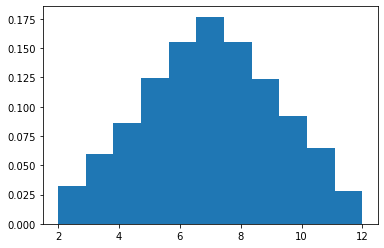

In [9]:
plt.hist(c, 11, density=True)

In [10]:
plt.show()

# 14 数组的排序和查找

## 14.1 排序

numpy的`sort()`函数，它将复制数组并返回排序结果。

In [11]:
a = np.random.randn(4)

In [12]:
a

array([ 0.25944667, -1.0873003 ,  0.56290138, -1.45977118])

In [13]:
np.sort(a)

array([-1.45977118, -1.0873003 ,  0.25944667,  0.56290138])

如果是多维数组，则可以设置axis参数定义需要排序的轴，sort()函数会对这个轴向上的所有元素排序。 

In [14]:
b = np.random.randn(3, 3)

In [15]:
b

array([[ 0.5361825 ,  0.03998547,  0.27339965],
       [-0.78238572,  0.23478099, -0.62801061],
       [ 0.19589569, -0.72812614,  1.96332753]])

In [16]:
np.sort(b, axis=0)

array([[-0.78238572, -0.72812614, -0.62801061],
       [ 0.19589569,  0.03998547,  0.27339965],
       [ 0.5361825 ,  0.23478099,  1.96332753]])

`sort()`函数的`order`参数定义排序的关键字段。 

In [17]:
dtype = [('name', 'U10'), ('height', float), ('weight', int)]

In [18]:
values = [('小明', 170.0, 58), ('小张', 165.0, 60), ('小李', 178.0, 70), ('小王', 170.0, 60)]

In [19]:
c = np.array(values, dtype=dtype)

In [20]:
c

array([('小明', 170., 58), ('小张', 165., 60), ('小李', 178., 70),
       ('小王', 170., 60)],
      dtype=[('name', '<U10'), ('height', '<f8'), ('weight', '<i8')])

先按“身高”排序，如果身高一样，则按“体重”排序。 

In [21]:
np.sort(c, order=['height', 'weight'])

array([('小张', 165., 60), ('小明', 170., 58), ('小王', 170., 60),
       ('小李', 178., 70)],
      dtype=[('name', '<U10'), ('height', '<f8'), ('weight', '<i8')])

数组对象有一个sort()函数，只是它是对数组进行原地排序。 

Numpy还提供了间接排序的函数: `lexsort()`，用于返回排序结果的索引值。

In [22]:
a = [5, 1, 4, 2, 8, 1]

In [23]:
b = [9, 5, 7, 4, 10, 4]

In [24]:
np.lexsort((a, b))

array([5, 3, 1, 2, 0, 4])

## 14.2 查找

searchsorted() 是查找数组元素时经常会用到的函数。查找一个合适的位置，将元素插入已排好序的一维数组中，并且保持数组元素的顺序不被打乱。

In [25]:
a = np.array([1, 4, 9, 10, 25])

In [26]:
np.searchsorted(a, 0)

0

In [27]:
np.searchsorted(a, 9)

2

In [28]:
np.searchsorted(a, 26)

5

In [29]:
np.searchsorted(a, [11, 15, 28])

array([4, 4, 5])

 searchsorted()函数有个参数side, 默认为left，如果数组有多个位置与查询的数字匹配，返回第一个位置, 如果设置成right，则返回最后一个位置。

In [30]:
a = np.array([1, 10, 10, 10, 25])

In [31]:
np.searchsorted(a, 10, side='right')

4

In [32]:
np.searchsorted(a, 10, side='left')

1

`extract()` 函数可以用来提取满足一定条件的元素，比如，提取0, 1, 2..., 16中不能被4整除的数。

In [33]:
a = np.arange(16).reshape(4, 4)

In [34]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [35]:
cond = np.mod(a, 4) != 0

In [36]:
cond

array([[False,  True,  True,  True],
       [False,  True,  True,  True],
       [False,  True,  True,  True],
       [False,  True,  True,  True]])

In [37]:
np.extract(cond, a)

array([ 1,  2,  3,  5,  6,  7,  9, 10, 11, 13, 14, 15])

# 15 扩充转换

标准的扩充转换（Broadcasting）的目的是，即使各个输入数组形状不完全一样，也能进行运算。

- 除纬度最大的输入数组外，其余的所有输入数组的维度向输入数组中最大的数组靠齐，并把那个维度考虑为1。
- 输出数组在各个维度上的长度和所有输入数组在那个维度上的最大长度一样。
- 如果输入数组在某个维度上的长度为1，或者和输出数组在那个维度上的长度一样，则会被用于实际的计算过程。
- 如果输入数组在某个维度上的长度为1，name那个维度上的数组的第一个元素会被用于后续在该维度上的计算。

最简单的就是一个数组和一个纯数之间的运算：

In [38]:
a = 10
b = np.arange(5)

In [39]:
a*b

array([ 0, 10, 20, 30, 40])

数组间的加法1 (行扩充)

In [40]:
a = np.arange(12).reshape(4, 3)

In [41]:
b = np.arange(3)

In [42]:
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [43]:
b

array([0, 1, 2])

In [44]:
a + b

array([[ 0,  2,  4],
       [ 3,  5,  7],
       [ 6,  8, 10],
       [ 9, 11, 13]])

数组间的加法1 (列扩充) 

In [45]:
b = np.arange(4).reshape(4, 1)

In [46]:
b

array([[0],
       [1],
       [2],
       [3]])

In [47]:
a + b

array([[ 0,  1,  2],
       [ 4,  5,  6],
       [ 8,  9, 10],
       [12, 13, 14]])

三维甚至更高维度的数组扩充更加复杂。 